In [1]:
import requests
import matplotlib.pyplot as plt

In [2]:
def get_iss_position():
    response = requests.get("http://api.open-notify.org/iss-now.json")
    data = response.json()
    if response.status_code == 200 and data["message"] == "success":
        timestamp = data["timestamp"]
        latitude = float(data["iss_position"]["latitude"])
        longitude = float(data["iss_position"]["longitude"])
        return timestamp, latitude, longitude
    else:
        return None

In [3]:
# Generate at least 100 data points with the latitude, longitude, and timestamp of the data point.
data_points = []
for _ in range(100):
    iss_data = get_iss_position()
    while iss_data is None:
        iss_data = get_iss_position()
    timestamp, latitude, longitude = iss_data
    data_points.append((timestamp, latitude, longitude))

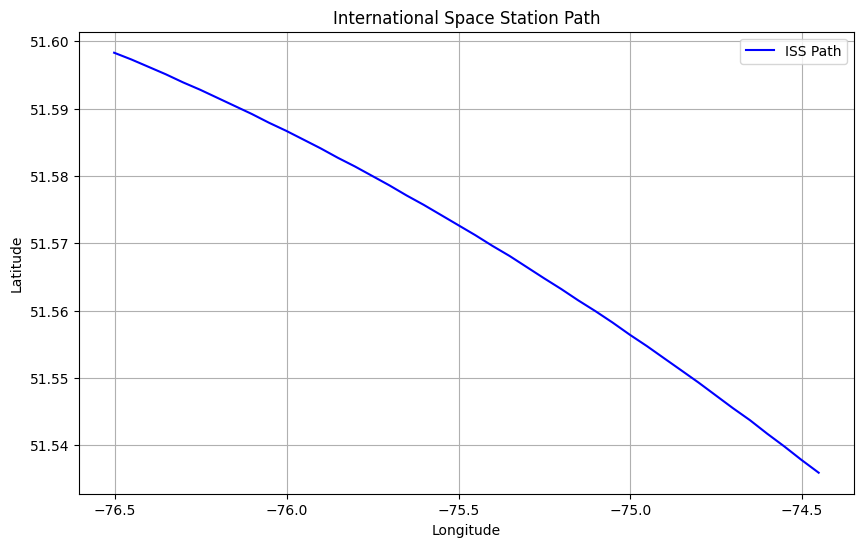

In [4]:
timestamps = [point[0] for point in data_points]
latitudes = [point[1] for point in data_points]
longitudes = [point[2] for point in data_points]

plt.figure(figsize=(10, 6))
plt.plot(longitudes, latitudes, 'b-', label="ISS Path")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('International Space Station Path')
plt.grid(True)
plt.legend()
plt.show()